In [1]:
import scanpy as sc
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import phate
import multiscale_phate as MSphate
PROJECT_DIR="/home/shuangni/AlzheimerProject"
# PROJECT_DIR = "C:/Users/nishu/OneDrive - Universite de Montreal/AlzheimerProejct"

In [2]:
######
# load data_raw
######
DATA_DIR_raw = PROJECT_DIR + '/data/msPHATE_data_raw.h5ad'
data_raw = sc.read_h5ad(DATA_DIR_raw)
print(data_raw)
# print(data_raw.obs.index)

AnnData object with n_obs × n_vars = 82159 × 32738
    obs: 'id', 'amyloid', 'plaq_n', 'nft', 'tangles', 'cogn_global_lv', 'gpath', 'gpath_3neocort', 'amyloid.group', 'caa_4gp', 'ceradsc', 'braaksc', 'niareagansc', 'cogdx', 'msex', 'pathology.group', 'diagnosis'
    var: 'gene_id'


In [9]:
print(data_raw)
print(data_raw.X)
print(data_raw.obs)
print(data_raw.obs.index)
print(data_raw.to_df().head())

AnnData object with n_obs × n_vars = 82159 × 32738
    obs: 'id', 'amyloid', 'plaq_n', 'nft', 'tangles', 'cogn_global_lv', 'gpath', 'gpath_3neocort', 'amyloid.group', 'caa_4gp', 'ceradsc', 'braaksc', 'niareagansc', 'cogdx', 'msex', 'pathology.group', 'diagnosis'
    var: 'gene_id'
  (0, 94)	1.0
  (0, 113)	1.0
  (0, 186)	1.0
  (0, 201)	1.0
  (0, 258)	1.0
  (0, 416)	1.0
  (0, 556)	1.0
  (0, 607)	1.0
  (0, 624)	1.0
  (0, 654)	1.0
  (0, 701)	1.0
  (0, 798)	1.0
  (0, 1213)	1.0
  (0, 1319)	1.0
  (0, 1355)	1.0
  (0, 1899)	1.0
  (0, 2092)	1.0
  (0, 2390)	1.0
  (0, 3014)	1.0
  (0, 3294)	1.0
  (0, 3386)	1.0
  (0, 3407)	1.0
  (0, 3519)	1.0
  (0, 3558)	1.0
  (0, 3583)	1.0
  :	:
  (82158, 32643)	1.0
  (82158, 32649)	1.0
  (82158, 32654)	2.0
  (82158, 32673)	1.0
  (82158, 32679)	2.0
  (82158, 32687)	1.0
  (82158, 32690)	1.0
  (82158, 32692)	2.0
  (82158, 32693)	1.0
  (82158, 32695)	3.0
  (82158, 32696)	56.0
  (82158, 32697)	41.0
  (82158, 32698)	150.0
  (82158, 32699)	84.0
  (82158, 32701)	67.0
  (8

In [4]:
######
# replace non-numerical values to numbers in data_raw.obs
######
data_raw.obs["msex"].replace({"female": "1", "male": "0"}, inplace=True)
data_raw.obs["pathology.group"].replace({"early-pathology": "-1", "late-pathology": "1", "no-pathology": "0"}, inplace=True)
data_raw.obs["amyloid.group"].replace({"high": "1", "low": "0"}, inplace=True)
print(data_raw.obs.head())

                   id  amyloid  plaq_n       nft   tangles  cogn_global_lv  \
barcode                                                                      
AAACGGGAGATCCCGC-1  1      0.0     0.0  0.029758  0.350492        1.180411   
AAAGATGCACGGTGTC-1  1      0.0     0.0  0.029758  0.350492        1.180411   
AAATGCCTCCAATGGT-1  1      0.0     0.0  0.029758  0.350492        1.180411   
AACCATGTCAGTGCAT-1  1      0.0     0.0  0.029758  0.350492        1.180411   
AACCATGTCTGTACGA-1  1      0.0     0.0  0.029758  0.350492        1.180411   

                       gpath  gpath_3neocort amyloid.group  caa_4gp  ceradsc  \
barcode                                                                        
AAACGGGAGATCCCGC-1  0.017128        0.012015             0        0        4   
AAAGATGCACGGTGTC-1  0.017128        0.012015             0        0        4   
AAATGCCTCCAATGGT-1  0.017128        0.012015             0        0        4   
AACCATGTCAGTGCAT-1  0.017128        0.012015         

In [5]:
phate_operator = phate.PHATE(n_jobs=-2)
Y2_phate = phate_operator.fit_transform(data_raw.obs)

Calculating PHATE...
  Running PHATE on 82159 observations and 17 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 5.08 seconds.
  Calculated graph and diffusion operator in 5.12 seconds.
Calculated PHATE in 5.12 seconds.


In [ ]:
diagnosis_raw = data_raw.obs.diagnosis
plt.figure()
sns.scatterplot(x = Y2_phate[:,0], y = Y2_phate[:,1], hue=diagnosis_raw, s = 5).set(title='Celltype for PHATE')

In [ ]:
MSphate_operator =  MSphate.Multiscale_PHATE(random_state=1)
levels = MSphate_operator.fit(data_raw)

In [ ]:
plt.figure()
ax = plt.plot(MSphate_operator.gradient)
ax = plt.scatter(levels, MSphate_operator.gradient[levels], c = 'r', s=100)
print(levels)

In [12]:
######
# load data_pp
######
DATA_DIR_pp = PROJECT_DIR + '/data/msPHATE_data_pp.h5ad'
data_pp = sc.read(DATA_DIR_pp)
print(data_pp)
tsne1 = data_pp.obs.tsne1
tsne2 = data_pp.obs.tsne2

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'id', 'tsne1', 'tsne2', 'pre.cluster', 'celltype', 'Subcluster', 'apoe_genotype', 'braak_stage', 'cerad_score', 'age_death', 'sex', 'pmi', 'concensus_diagnosis', 'diagnosis_cerad', 'diagnosis', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


In [14]:
######
# plot_figures function
######
def plot_figures(x_axis, y_axis, titles= None):
  
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    # plt.figure()
    # sns.scatterplot(ax=axes[0, 0], x = tsne1, y = tsne2, hue=ids, legend=False, s = 5).set(title='ID for T-SNE')

    plt.figure()
    celltypes_fig = sns.scatterplot(ax=axes[0,0], x = x_axis, y = y_axis, hue=celltypes, s = 5).set(title='Celltypes for '+ titles)
    # plt.savefig(PROJECT_DIR + '/figures/tsne_celltypes_fig.pdf')

    # plt.figure()
    Subclusters_fig = sns.scatterplot(ax=axes[0,1], x = x_axis, y = y_axis, hue=Subclusters, legend=False, s = 5).set(title='Subclusters for '+ titles)
    # plt.savefig(PROJECT_DIR + '/figures/tsne_Subclusters_fig.pdf')

    plt.figure()
    cerad_scores_fig = sns.scatterplot(ax=axes[1,0], x = x_axis, y = y_axis, hue=cerad_scores, s = 5).set(title='Cerad Score for '+ titles)
    # plt.savefig(PROJECT_DIR + '/figures/tsne_ceradscore_fig.pdf')

    plt.figure()
    diagnosis_fig = sns.scatterplot(ax=axes[1,1], x = x_axis, y = y_axis, hue=diagnosises, s = 5).set(title='diagnosis for '+ titles)
    # plt.savefig(PROJECT_DIR + '/figures/tsne_diagnosis_fig.pdf')

    plt.figure()
    braak_stages_fig = sns.scatterplot(ax=axes[1,2], x = x_axis, y = y_axis, hue=braak_stages, s = 5).set(title='braak_stages for '+ titles)
    # plt.savefig(PROJECT_DIR + '/figures/tsne_braak_stages_fig.pdf')

    plt.figure()
    apoe_genotypes_fig = sns.scatterplot(ax=axes[0,2], x = x_axis, y = y_axis, hue=apoe_genotypes, s = 5).set(title='apoe_genotypes for '+ titles)

    plt.savefig(PROJECT_DIR + '/figures/'+ titles +'_all_fig.pdf')

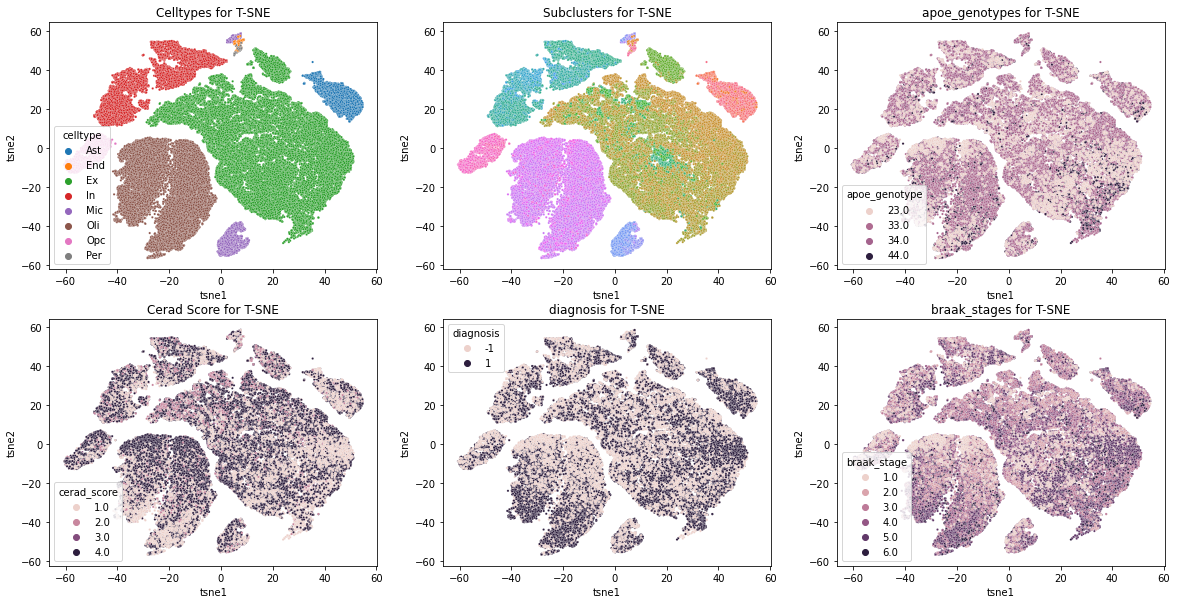

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
######
# tsne in data_pp plots
######
# tsne1 = data_pp.obs.tsne1
# tsne2 = data_pp.obs.tsne2
ids = data_pp.obs.id
celltypes = data_pp.obs.celltype
Subclusters = data_pp.obs.Subcluster
cerad_scores = data_pp.obs.cerad_score
diagnosises = data_pp.obs.diagnosis
braak_stages = data_pp.obs.braak_stage
apoe_genotypes = data_pp.obs.apoe_genotype

plot_figures(x_axis=tsne1, y_axis=tsne2, titles= 'T-SNE')

In [102]:
######
# PHATE for raw data withou any process
######
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate = phate_operator.fit_transform(data_raw)

Calculating PHATE...
  Running PHATE on 82159 observations and 32738 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 73.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 73.72 seconds.
    Calculating affinities...
    Calculated affinities in 2.30 seconds.
  Calculated graph and diffusion operator in 150.11 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 12.45 seconds.
    Calculating KMeans...
    Calculated KMeans in 11.20 seconds.
  Calculated landmark operator in 26.83 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 1.72 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.90 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.89 seconds.
Calculated PHATE in 188.47 seconds.


[Text(0.5, 1.0, 'Celltype for PHATE')]

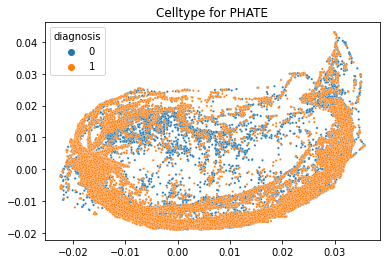

In [115]:
diagnosis_raw = data_raw.obs.diagnosis
plt.figure()
sns.scatterplot(x = Y_phate[:,0], y = Y_phate[:,1], hue=diagnosis_raw, s = 5).set(title='Celltype for PHATE')

In [116]:
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_pp = phate_operator.fit_transform(data_pp)

Calculating PHATE...
  Running PHATE on 70634 observations and 17926 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 47.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 134.97 seconds.
    Calculating affinities...
    Calculated affinities in 17.17 seconds.
  Calculated graph and diffusion operator in 200.19 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 9.56 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.36 seconds.
  Calculated landmark operator in 19.86 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 1.44 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.58 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.32 seconds.
Calculated PHATE in 228.43 seconds.


[Text(0.5, 1.0, 'Celltype for PHATE (preprocessed)')]

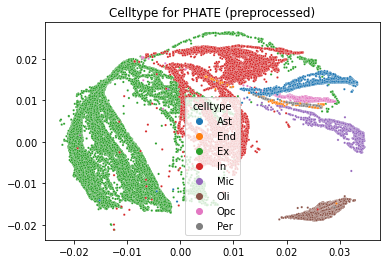

In [117]:
plt.figure()
sns.scatterplot(x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=celltypes, s = 5).set(title='Celltype for PHATE (preprocessed)')

In [ ]:
plot_figures(x_axis = Y_phate_pp[:,0], y_axis = Y_phate_pp[:,1], titles= 'PHATE')

In [ ]:
# datatype not correct
data_pp_removed = data_pp.obs.drop(columns=['tsne1', 'tsne2'])
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_pp = phate_operator.fit_transform(data_pp_removed)